In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import STL
%matplotlib inline
from sktime.forecasting.all import temporal_train_test_split
from sktime.forecasting.all import NaiveForecaster


import warnings
warnings.filterwarnings('ignore')

In [8]:

os.chdir('/Users/liuhailun/Desktop/TS_Forecasting_Project-main/Data/Input/New_Construction')

data = pd.read_csv('Metro_invt_fs_uc_sfrcondo_sm_month.csv')

In [11]:
NYU = pd.DataFrame()
NYU['price_NYU'] = pd.to_numeric(data.iloc[1, 5:], errors='coerce')
NYU.reset_index(inplace=True)
NYU.rename(columns={'index': 'Date'}, inplace=True)

In [13]:
NYU.head()

,Date,price_NYU
0,2018-03-31,73707.0
1,2018-04-30,80345.0
2,2018-05-31,85864.0
3,2018-06-30,90067.0
4,2018-07-31,91881.0


In [16]:
#Split y into Train and Test Groups

In [61]:
y = NYU['price_NYU']

In [63]:
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

In [65]:
#Naive Method - Last
model = NaiveForecaster(strategy = 'last')

In [67]:
model.fit(y_train)

NaiveForecaster()

In [69]:
fh = list(range(1, 1+len(y_test)))

In [71]:
y_pred = model.predict(fh=fh )

<Axes: >

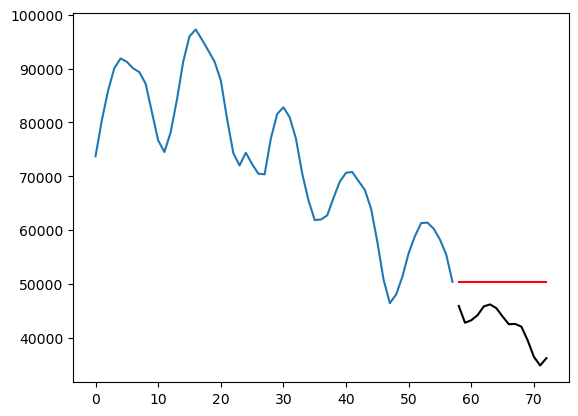

In [73]:
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

In [80]:
#Evaluate Results
def smape(y_true, y_pred):
    return 100 * (2 * abs(y_pred - y_true) / (abs(y_true) + abs(y_pred))).mean()


In [82]:
smape(y_test, y_pred )

18.221254516775073

In [86]:
#Naive Method - Mean
model2 = NaiveForecaster(strategy = 'mean')

In [89]:
model2.fit(y_train)

NaiveForecaster(strategy='mean')

In [92]:
y_pred2 = model2.predict(fh=fh )

<Axes: >

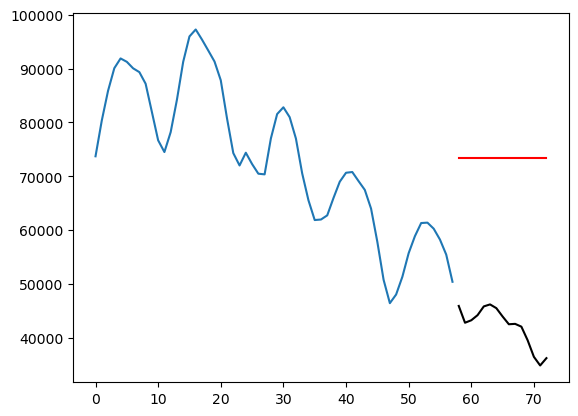

In [95]:
y_train.plot()
y_pred2.plot(color='red')
y_test.plot(color = 'black')

In [98]:
smape(y_test, y_pred2 )

54.38800023299234

In [101]:
#Naive Method - Drift

In [104]:
model3 = NaiveForecaster(strategy = 'drift')

In [107]:
model3.fit(y_train)

NaiveForecaster(strategy='drift')

In [110]:
y_pred3 = model3.predict(fh=fh )

<Axes: >

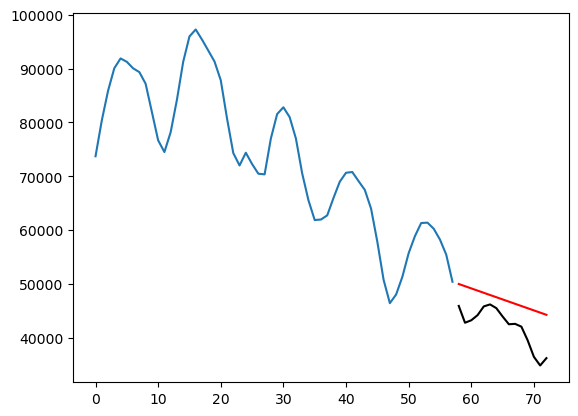

In [113]:
y_train.plot()
y_pred3.plot(color='red')
y_test.plot(color = 'black')

In [116]:
smape(y_test, y_pred3 )

11.506719881033172